In [7]:
# %run AutoDataPrep.py
# %run Imbalanced.py

In [8]:
# if code is running on IBM Cloud Pak, comment out
%run AutoDataPrep.ipynb
%run Imbalanced.ipynb

In [9]:
import pandas as pd

In [10]:
# if code is running on IBM Cloud Pak, uncomment
# from ibm_watson_studio_lib import access_project_or_space
# wslib = access_project_or_space()
# df = pd.read_csv(wslib.mount.get_data_path('german_credit_data (1).csv'))
# df.head()

In [11]:
# if code is running on IBM Cloud Pak, comment and run
df = pd.read_csv('bank_customer_data.csv')
df = df[:70000]

'Has Bad Payment Record' feature is imbalanced with 99% of its entries containing the value: 0.
'Accepted Personal Loan' feature is imbalanced with 87% of its entries containing the value: F.
'Accepted Retention' feature is imbalanced with 87% of its entries containing the value: F.
'Accepted Home Equity Loan' feature is imbalanced with 88% of its entries containing the value: F.
'Accepted Credit Card' feature is imbalanced with 88% of its entries containing the value: F.
'Interested in Personal Loan' feature is imbalanced with 96% of its entries containing the value: F.
'Interested in Retention' feature is imbalanced with 88% of its entries containing the value: F.
'Interested in Home Equity Loan' feature is imbalanced with 88% of its entries containing the value: F.
'Interested in Credit Card' feature is imbalanced with 89% of its entries containing the value: F.

Enter 1 to remove Has Bad Payment Record, 0 to keep it for further analysis: 0
Enter 1 to remove Accepted Personal Loan, 

,Age,Months as a Customer,Number of Products,RFM Score,Average Balance Feed Index,Number of Transactions,Personal Debt to Equity Ratio,Months Current Account,Number of Loan Accounts,Customer ID,...,Interested in Personal Loan_F,Interested in Personal Loan_T,Interested in Home Equity Loan_F,Interested in Home Equity Loan_T,Interested in Retention_F,Interested in Retention_T,Interested in Credit Card_F,Interested in Credit Card_T,Homeowner_F,Homeowner_T
0,40,24.0,3,9.829,229,2,40,13,0,5409,...,1,0,1,0,1,0,1,0,1,0
1,47,12.0,2,11.808,8,1,47,5,2,5477,...,1,0,1,0,1,0,1,0,1,0
2,35,36.0,0,0.000,0,0,35,31,0,5507,...,1,0,0,1,1,0,1,0,0,1
3,45,0.0,0,0.000,0,0,45,-3,0,8,...,1,0,1,0,0,1,1,0,1,0
4,13,48.0,0,0.000,0,0,13,39,0,158,...,1,0,0,1,1,0,1,0,0,1


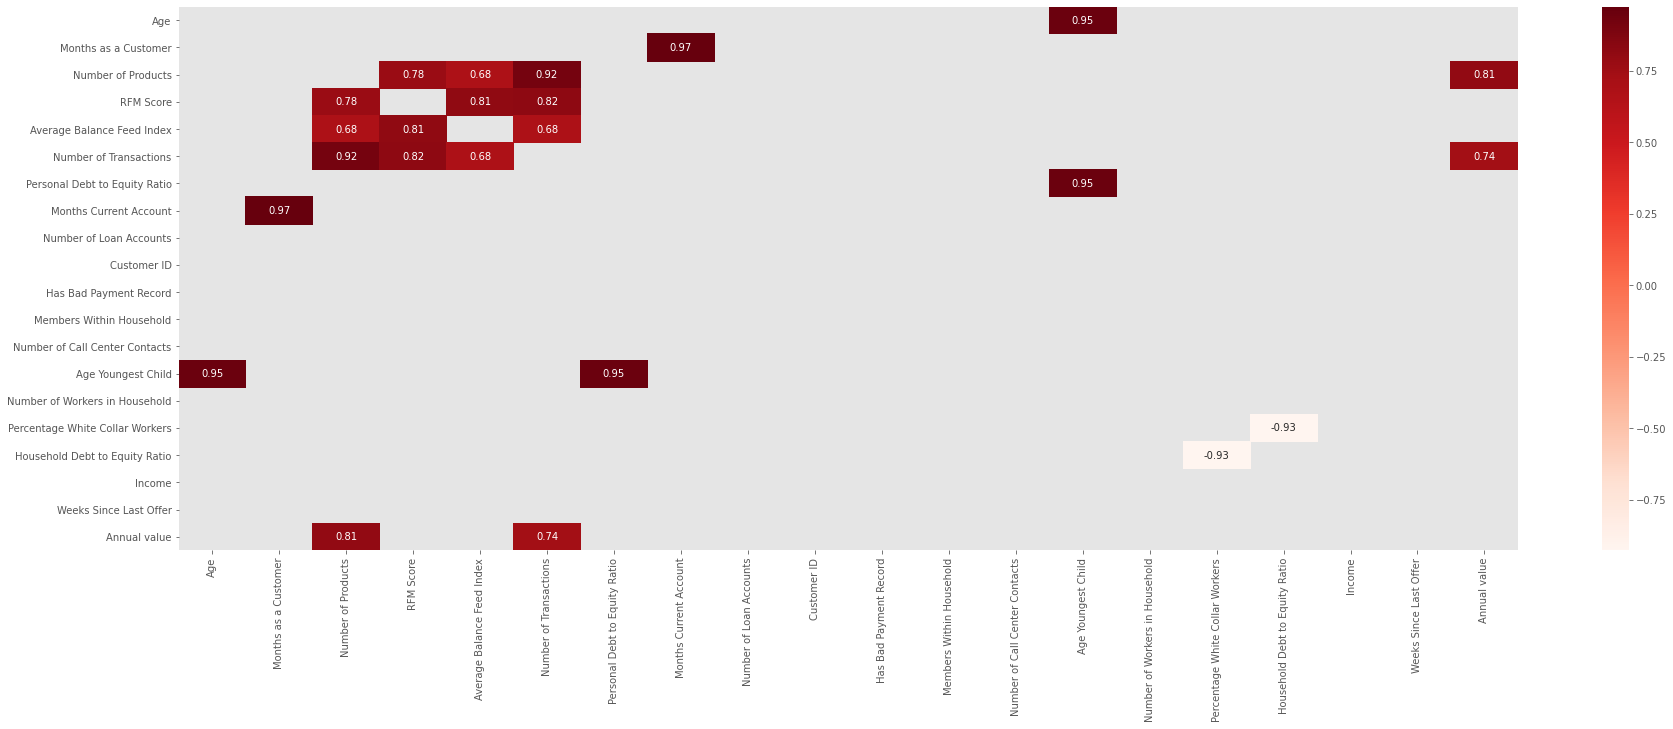

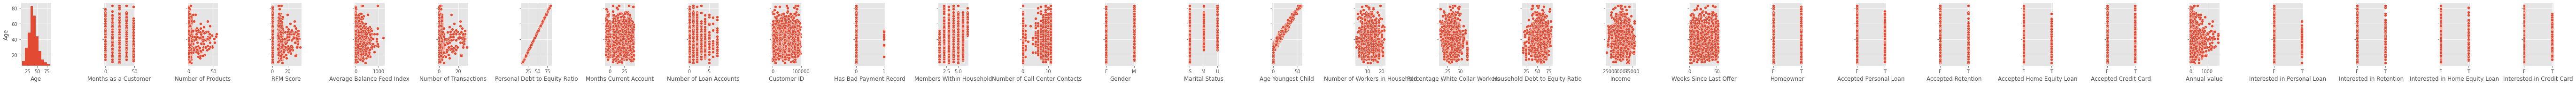

In [12]:
imbalanced_dict, info_message = Imbalanced.handle(df)
"""
options = st.multiselect(
     'Select the features you wish to be removed from further analysis',
     list(imbalanced_dict.keys()))

st.write('You selected:', options)
"""
cols_to_remove = []
print(info_message)
for key in imbalanced_dict.keys():
    txt = 'Enter 1 to remove ' + key + ', 0 to keep it for further analysis: '
    rem = int(input(txt))
    if rem == 1:
        cols_to_remove.append(key)
pipeline = AutoDataPrep(df, cols_to_remove)
pipeline.output.head()

In [7]:
pipeline.output.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk', 'LoanDuration_mms', 'LoanAmount_mms',
       'Age_mms', 'Job_management_self-employed', 'Job_skilled',
       'Job_unemployed', 'Job_unskilled', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'OwnsProperty_car_other',
       'OwnsProperty_real_estate', 'OwnsProperty_savings_insurance',
       'OwnsProperty_unknown', 'Risk_No Risk', 'Risk_Risk',
       'ExistingSavings_100_to_500', 'ExistingSavings_500_to_1000',
       'ExistingSavings_greater_1000', 'ExistingSavings_less_100',
       'ExistingSavings_unknown', 'OthersOnLoan_co-applicant',
       'OthersOnLoan_guarantor', 'OthersOnLoan_no